In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Mental Health Problems: Mood Swings, Increasing Stress, Mental Health History, and Social Weakness
# Independent Variables: Gender, Country, Occupation, SelfEmployed, FamilyHistory(?)
# Dependent Variables: HabitsChange, IncreasingStress, MoodSwings, SocialWeakness, CopingStruggles
# Uncategorized Variables: Treatment, DaysIndoors, MentalHealthHistory, WorkInterest, CareOptions
df = pd.read_csv('Mental_Health_dataset1.csv')
df.drop('SocialWeakness.1', axis=1, inplace=True)

independent_var = ['Gender','Country','Occupation','SelfEmployed','FamilyHistory']
dependent_var = ['IncreasingStress','SocialWeakness','MoodSwings','HabitsChange','WorkInterest','CopingStruggles']
mental_health_var = ['Treatment', 'MentalHealthInterview']
df

,Gender,Country,Occupation,SelfEmployed,FamilyHistory,Treatment,DaysIndoors,HabitsChange,MentalHealthHistory,IncreasingStress,MoodSwings,SocialWeakness,CopingStruggles,WorkInterest,MentalHealthInterview,CareOptions
0,Female,UK,Others,No,Yes,No,15-30 days,No,Yes,Yes,High,No,Yes,Maybe,No,No
1,Female,USA,Housewife,No,Yes,No,15-30 days,Maybe,Maybe,Yes,High,Maybe,Yes,Maybe,No,Not sure
2,Female,Canada,Others,No,No,Yes,More than 2 months,Maybe,No,No,Medium,No,No,No,No,Not sure
3,Female,Canada,Corporate,No,Yes,Yes,Go out Every day,No,Maybe,No,Medium,No,No,Maybe,No,Not sure
4,Female,UK,Corporate,No,No,Yes,More than 2 months,Yes,No,Maybe,Medium,Maybe,No,Maybe,No,Not sure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261323,Male,USA,Business,No,No,No,15-30 days,Maybe,No,No,Low,Maybe,Yes,No,Maybe,Not sure
261324,Male,USA,Business,Yes,Yes,Yes,15-30 days,Maybe,No,No,Low,Maybe,Yes,No,Maybe,Not sure
261325,Male,USA,Business,No,Yes,No,15-30 days,Maybe,No,No,Low,Maybe,Yes,No,No,No
261326,Male,USA,Business,No,Yes,Yes,15-30 days,Maybe,No,No,Low,Maybe,Yes,No,No,Yes


In [3]:
df.isnull().sum() # Check for null values

Gender                      0
Country                     0
Occupation                  0
SelfEmployed             4356
FamilyHistory               0
Treatment                   0
DaysIndoors                 0
HabitsChange                0
MentalHealthHistory         0
IncreasingStress            0
MoodSwings                  0
SocialWeakness              0
CopingStruggles             0
WorkInterest                0
MentalHealthInterview       0
CareOptions                 0
dtype: int64

In [4]:
# Remove null values
df = df.dropna()
df.isnull().sum()

Gender                   0
Country                  0
Occupation               0
SelfEmployed             0
FamilyHistory            0
Treatment                0
DaysIndoors              0
HabitsChange             0
MentalHealthHistory      0
IncreasingStress         0
MoodSwings               0
SocialWeakness           0
CopingStruggles          0
WorkInterest             0
MentalHealthInterview    0
CareOptions              0
dtype: int64

In [5]:
DaysIndoors = df['DaysIndoors'].unique()
Nationality = df['Country'].unique()
Occupation = df['Occupation'].unique()
MoodSwings = df['MoodSwings'].unique()
CareOptions = df['CareOptions'].unique()
Gender = df['Gender'].value_counts() # 230,614 male, 30,714 female
#df['SocialWeakness'].compare(df['SocialWeakness.1']) # RM SocialWeakness.1
Occupation

array(['Others', 'Housewife', 'Corporate', 'Student', 'Business'],
      dtype=object)

In [6]:
HabitsChange_Values = df['HabitsChange'].value_counts()
Nationality_Values = df['Country'].value_counts() # Treat maybes like a 0.5?
HabitsChange_Values

HabitsChange
Yes      96066
Maybe    83654
No       77252
Name: count, dtype: int64

In [7]:
# Readjusted Nationality_Values to a 2D Array
Country_Values = np.array([Nationality_Values.index.tolist(), Nationality_Values.tolist()]).T
Country_Values

array([['USA', '151814'],
       ['UK', '47110'],
       ['Canada', '13253'],
       ['Netherlands', '5639'],
       ['Ireland', '5128'],
       ['Germany', '4615'],
       ['Australia', '3544'],
       ['India', '2565'],
       ['Sweden', '2414'],
       ['France', '2306'],
       ['South Africa', '1807'],
       ['New Zealand', '1790'],
       ['Italy', '1538'],
       ['Switzerland', '1538'],
       ['Israel', '1537'],
       ['Brazil', '1338'],
       ['Singapore', '770'],
       ['Russia', '769'],
       ['Greece', '768'],
       ['Denmark', '766'],
       ['Poland', '637'],
       ['Belgium', '477'],
       ['Nigeria', '385'],
       ['Croatia', '385'],
       ['Thailand', '385'],
       ['Moldova', '385'],
       ['Costa Rica', '384'],
       ['Mexico', '384'],
       ['Czech Republic', '384'],
       ['Colombia', '384'],
       ['Finland', '384'],
       ['Portugal', '384'],
       ['Georgia', '384'],
       ['Philippines', '384'],
       ['Bosnia and Herzegovina', '237']], dty

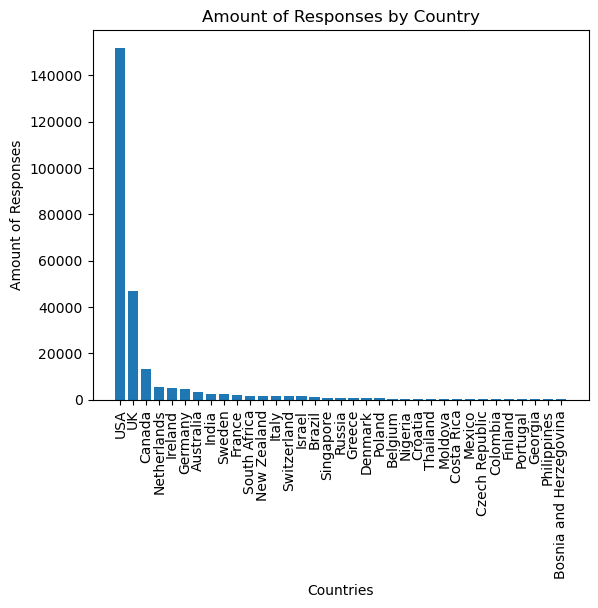

In [8]:
plt.bar(Nationality_Values.index.tolist(), Nationality_Values.tolist())
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Amount of Responses')
plt.title('Amount of Responses by Country')
plt.savefig('ResponsesByCountry.png')
plt.show()

In [9]:
df.describe(include='object')

,Gender,Country,Occupation,SelfEmployed,FamilyHistory,Treatment,DaysIndoors,HabitsChange,MentalHealthHistory,IncreasingStress,MoodSwings,SocialWeakness,CopingStruggles,WorkInterest,MentalHealthInterview,CareOptions
count,256972,256972,256972,256972,256972,256972,256972,256972,256972,256972,256972,256972,256972,256972,256972,256972
unique,2,35,5,2,2,2,5,3,3,3,3,3,2,3,3,3
top,Male,USA,Housewife,No,No,No,1-14 days,Yes,No,Maybe,Medium,Maybe,No,No,No,No
freq,227002,151814,59078,230404,159260,130882,56628,96066,92472,89195,88731,91728,136962,92881,203197,106970


In [10]:
# Chi-Squared Test
# Gender and Increasing Stress
contingency_table = pd.crosstab(df['Gender'], df['IncreasingStress'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Gender and Increasing Stress Table:")
print(contingency_table)
print(f"Chi Stat: {chi2}")
print(f"P-value: {p_value}")

Gender and Increasing Stress Table:
IncreasingStress  Maybe     No    Yes
Gender                               
Female             9016   9037  11917
Male              80179  71817  75006
Chi Stat: 581.3048245265506
P-value: 5.9055615763712765e-127


In [11]:
# Gender and Country
pd.set_option('display.max_columns', None) # Print whole table
c_table = pd.crosstab(df['Gender'], df['Country'])
print("Gender by Country:")
print(c_table)
pd.reset_option('display.max_columns') # Reset table settings

Gender by Country:
Country  Australia  Belgium  Bosnia and Herzegovina  Brazil  Canada  Colombia  \
Gender                                                                          
Female        1028      250                       0       0    2286         0   
Male          2516      227                     237    1338   10967       384   

Country  Costa Rica  Croatia  Czech Republic  Denmark  Finland  France  \
Gender                                                                   
Female            0        0               0        0        0       0   
Male            384      385             384      766      384    2306   

Country  Georgia  Germany  Greece  India  Ireland  Israel  Italy  Mexico  \
Gender                                                                     
Female         0        0       0    259      515       0      0       0   
Male         384     4615     768   2306     4613    1537   1538     384   

Country  Moldova  Netherlands  New Zealand  Nigeria  P

In [12]:
import matplotlib.colors as mcolors
cmap = plt.colormaps['Greys']
num_colors = 39
sampled_colors_rgba = cmap(np.linspace(0, 1, num_colors))
hex_colors = [mcolors.to_hex(color) for color in sampled_colors_rgba]

cmap = plt.colormaps['plasma']
num_colors = 39
sampled_colors_rgba = cmap(np.linspace(0, 1, num_colors))
plasma_colors = [mcolors.to_hex(color) for color in sampled_colors_rgba]
print(plasma_colors)
Gendered_Countries = hex_colors * [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]

['#0d0887', '#1d068e', '#2c0594', '#38049a', '#43039e', '#4e02a2', '#5901a5', '#6400a7', '#6e00a8', '#7801a8', '#8305a7', '#8d0ba5', '#9511a1', '#9e199d', '#a72197', '#b02991', '#b6308b', '#be3885', '#c5407e', '#cc4778', '#d14e72', '#d7566c', '#dd5e66', '#e26561', '#e76e5b', '#eb7655', '#f07f4f', '#f3874a', '#f79044', '#f99a3e', '#fca338', '#fdac33', '#feb72d', '#fdc229', '#fccd25', '#fbd724', '#f7e225', '#f3ee27', '#f0f921']


TypeError: can't multiply sequence by non-int of type 'list'

In [13]:
colors = ['#f9f9f9', '#f6f6f6', '#2c0594', '#38049a', '#eaeaea', '#4e02a2', '#5901a5', '#6400a7', '#6e00a8', '#7801a8', '#8305a7', '#8d0ba5', '#9511a1', '#9e199d', '#a72197', '#a7a7a7', '#9e9e9e', '#be3885', '#c5407e', '#cc4778', '#d14e72', '#797979', '#717171', '#e26561', '#e76e5b', '#5d5d5d', '#f07f4f', '#f3874a', '#f79044', '#3a3a3a', '#303030', '#fbd724', '#f7e225', '#171717', '#0f0f0f', '#070707', '#000000', '#ffffff', '#fcfcfc']

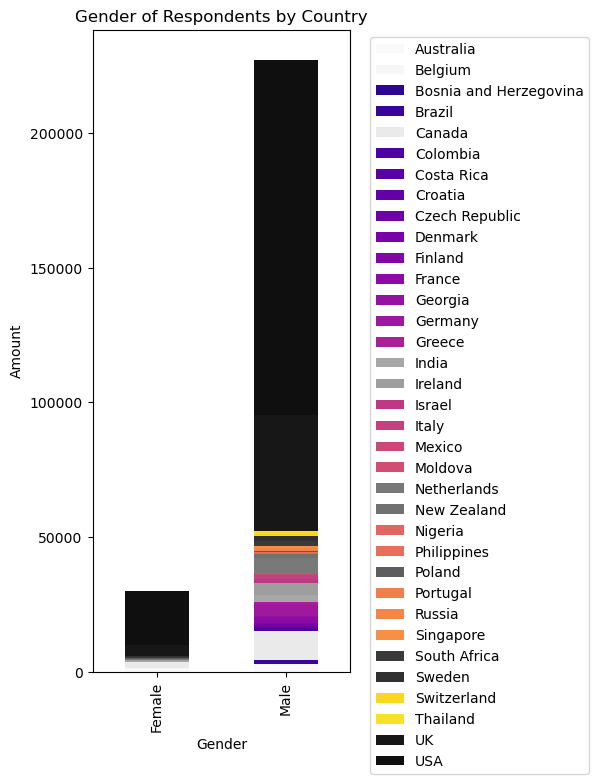

In [14]:
ax = c_table.plot(kind="bar", stacked=True, color=colors, figsize=(6,8))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title("Gender of Respondents by Country")
plt.ylabel("Amount")
plt.show()
# Countries and Gender Bar Plot
#w, x = 0.4, np.arrange(len(

In [15]:
# Gender and Occupation
c_table = pd.crosstab(df['Gender'], df['Occupation'], normalize='index').mul(100).round(2)
print("Gender and Occupation by Percentage:")
print(c_table)

Gender and Occupation by Percentage:
Occupation  Business  Corporate  Housewife  Others  Student
Gender                                                     
Female         18.36      16.96      22.21   19.81    22.65
Male           16.63      21.86      23.09   17.93    20.49


In [16]:
# Occupation and Dependent Variables
for var in dependent_var:
    c_table = pd.crosstab(df['Occupation'], df[var], normalize='index').mul(100).round(2)
    print(f"Occupation and {var} by Percentage:")
    print(c_table)
    print()

Occupation and IncreasingStress by Percentage:
IncreasingStress  Maybe     No    Yes
Occupation                           
Business          35.17  25.87  38.96
Corporate         27.86  33.92  38.22
Housewife         36.89  34.43  28.68
Others            35.29  36.61  28.10
Student           38.44  25.69  35.86

Occupation and SocialWeakness by Percentage:
SocialWeakness  Maybe     No    Yes
Occupation                         
Business        29.90  35.55  34.54
Corporate       40.74  29.37  29.89
Housewife       30.58  34.66  34.76
Others          36.02  38.22  25.76
Student         40.61  31.37  28.02

Occupation and MoodSwings by Percentage:
MoodSwings   High    Low  Medium
Occupation                      
Business    27.35  30.65   42.00
Corporate   26.02  29.35   44.64
Housewife   27.23  40.16   32.60
Others      30.92  40.99   28.09
Student     44.99  29.14   25.86

Occupation and HabitsChange by Percentage:
HabitsChange  Maybe     No    Yes
Occupation                       
Busi

In [17]:
# Family History and Dependent Variables
for var in dependent_var:
    c_table = pd.crosstab(df['FamilyHistory'], df[var], normalize='index').mul(100).round(2)
    chi2, p_value, dof, expected = chi2_contingency(c_table)
    print(f"Family History and {var} by Percentage:")
    print(c_table)
    print()
    print(f"Chi Stat: {chi2.round(4)} | P-Value: {p_value.round(3)} | Degrees of Freedom: {dof} | Expected Frequencies: {expected.round(2)}")
    print()

Family History and IncreasingStress by Percentage:
IncreasingStress  Maybe     No    Yes
FamilyHistory                        
No                34.94  31.53  33.53
Yes               34.34  31.36  34.30

Chi Stat: 0.0144 | P-Value: 0.993 | Degrees of Freedom: 2 | Expected Frequencies: [[34.64 31.44 33.92]
 [34.64 31.44 33.92]]

Family History and SocialWeakness by Percentage:
SocialWeakness  Maybe     No    Yes
FamilyHistory                      
No              35.78  33.61  30.61
Yes             35.56  33.71  30.73

Chi Stat: 0.0011 | P-Value: 0.999 | Degrees of Freedom: 2 | Expected Frequencies: [[35.67 33.66 30.67]
 [35.67 33.66 30.67]]

Family History and MoodSwings by Percentage:
MoodSwings      High    Low  Medium
FamilyHistory                      
No             31.23  34.15   34.62
Yes            31.54  34.07   34.38

Chi Stat: 0.0025 | P-Value: 0.999 | Degrees of Freedom: 2 | Expected Frequencies: [[31.39 34.11 34.5 ]
 [31.38 34.11 34.5 ]]

Family History and HabitsChange by

In [18]:
# Mental Health History and Days Indoors
c_table = pd.crosstab(df['MentalHealthHistory'], df['DaysIndoors'], normalize='index').mul(100).round(2)
print("Mental Health History and Days Indoors by Percentage:")
print(c_table)

Mental Health History and Days Indoors by Percentage:
DaysIndoors          1-14 days  15-30 days  31-60 days  Go out Every day  \
MentalHealthHistory                                                        
Maybe                    19.29       16.99       25.12             16.64   
No                       26.16       15.68       19.66             21.36   
Yes                      20.17       21.74       18.41             22.08   

DaysIndoors          More than 2 months  
MentalHealthHistory                      
Maybe                             21.96  
No                                17.14  
Yes                               17.60  


In [19]:
# Mental Health History and Treatment
c_table = pd.crosstab(df['MentalHealthHistory'], df['Treatment'], normalize='index').mul(100).round(2)
print("Mental Health History and Treatment by Percentage:")
print(c_table)

Mental Health History and Treatment by Percentage:
Treatment               No    Yes
MentalHealthHistory              
Maybe                50.64  49.36
No                   51.14  48.86
Yes                  51.00  49.00


In [20]:
# Mental Health History and Dependent Variables
for var in dependent_var:
    c_table = pd.crosstab(df['MentalHealthHistory'], df[var], normalize='index').mul(100).round(2)
    chi2, p_value, dof, expected = chi2_contingency(c_table)
    print(f"Mental Health History and {var} by Percentage:")
    print(c_table)
    print()
    print(f"Chi Stat: {chi2.round(4)} | P-Value: {p_value.round(3)} | Degrees of Freedom: {dof} | Expected Frequencies: {expected.round(2)}")
    print()

Mental Health History and IncreasingStress by Percentage:
IncreasingStress     Maybe     No    Yes
MentalHealthHistory                     
Maybe                34.93  31.01  34.05
No                   35.47  32.76  31.77
Yes                  33.61  30.45  35.94

Chi Stat: 0.4023 | P-Value: 0.982 | Degrees of Freedom: 4 | Expected Frequencies: [[34.67 31.4  33.92]
 [34.67 31.41 33.92]
 [34.67 31.41 33.92]]

Mental Health History and SocialWeakness by Percentage:
SocialWeakness       Maybe     No    Yes
MentalHealthHistory                     
Maybe                39.05  31.61  29.34
No                   34.29  31.26  34.45
Yes                  33.84  38.48  27.68

Chi Stat: 2.2644 | P-Value: 0.687 | Degrees of Freedom: 4 | Expected Frequencies: [[35.73 33.78 30.49]
 [35.73 33.78 30.49]
 [35.73 33.78 30.49]]

Mental Health History and MoodSwings by Percentage:
MoodSwings            High    Low  Medium
MentalHealthHistory                      
Maybe                30.93  39.91   29.16
No

In [21]:
# Self Employed and Dependent Variables by Occupation
Occupation_list = Occupation.tolist()
for var in dependent_var:
    c_table = pd.crosstab(df['Occupation'], df[var], normalize='index').mul(100).round(2)
    chi2, p_value, dof, expected = chi2_contingency(c_table)
    print(f"Occupation and {var} by Percentage:")
    print(c_table)
    print()
    print(f"Chi Stat: {chi2.round(4)} | P-Value: {p_value.round(3)} | Degrees of Freedom: {dof} | Expected Frequencies: {expected.round(2)}")
    print()

Occupation and IncreasingStress by Percentage:
IncreasingStress  Maybe     No    Yes
Occupation                           
Business          35.17  25.87  38.96
Corporate         27.86  33.92  38.22
Housewife         36.89  34.43  28.68
Others            35.29  36.61  28.10
Student           38.44  25.69  35.86

Chi Stat: 8.493 | P-Value: 0.387 | Degrees of Freedom: 8 | Expected Frequencies: [[34.73 31.3  33.96]
 [34.73 31.3  33.96]
 [34.73 31.3  33.96]
 [34.73 31.3  33.96]
 [34.73 31.3  33.96]]

Occupation and SocialWeakness by Percentage:
SocialWeakness  Maybe     No    Yes
Occupation                         
Business        29.90  35.55  34.54
Corporate       40.74  29.37  29.89
Housewife       30.58  34.66  34.76
Others          36.02  38.22  25.76
Student         40.61  31.37  28.02

Chi Stat: 6.5921 | P-Value: 0.581 | Degrees of Freedom: 8 | Expected Frequencies: [[35.57 33.83 30.59]
 [35.57 33.83 30.59]
 [35.57 33.83 30.59]
 [35.57 33.83 30.59]
 [35.57 33.83 30.59]]

Occupation 

In [22]:
# All Variables P-Value <= 0.05
all_comp = []
for ivar in independent_var:
    for dvar in dependent_var:
        c_table = pd.crosstab(df[ivar], df[dvar], normalize='index').mul(100).round(2)
        chi2, p_value, dof, expected = chi2_contingency(c_table)
        if p_value <= 0.1:
            all_comp.append(f"{ivar} and {dvar}")
            print(f"{ivar} and {dvar} by Percentage:")
            print(c_table)
            print()
            print(f"Chi Stat: {chi2.round(4)} | P-Value: {p_value.round(3)} | Degrees of Freedom: {dof} | Expected Frequencies: {expected.round(2)}")
            print()
print(all_comp)

Occupation and MoodSwings by Percentage:
MoodSwings   High    Low  Medium
Occupation                      
Business    27.35  30.65   42.00
Corporate   26.02  29.35   44.64
Housewife   27.23  40.16   32.60
Others      30.92  40.99   28.09
Student     44.99  29.14   25.86

Chi Stat: 20.1518 | P-Value: 0.01 | Degrees of Freedom: 8 | Expected Frequencies: [[31.3  34.06 34.64]
 [31.31 34.06 34.64]
 [31.3  34.06 34.64]
 [31.3  34.06 34.64]
 [31.3  34.06 34.64]]

['Occupation and MoodSwings']


In [63]:
OMS_table = pd.crosstab(df['Occupation'], df['MoodSwings'], normalize='index').mul(100).round(2)
OMS_table = OMS_table.reindex(['High', 'Medium', 'Low'], axis=1)
OMS_table

MoodSwings,High,Medium,Low
Occupation,,,
Business,27.35,42.00,30.65
Corporate,26.02,44.64,29.35
Housewife,27.23,32.60,40.16
Others,30.92,28.09,40.99
Student,44.99,25.86,29.14


Text(0, 0.5, 'Percentage of Occupation')

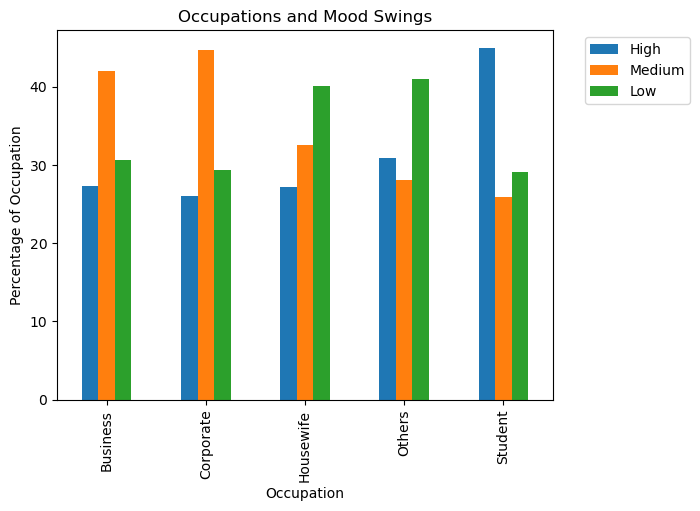

In [67]:
# Occupation and Mood Swings Chart
OMS_table = pd.crosstab(df['Occupation'], df['MoodSwings'], normalize='index').mul(100).round(2)
OMS_table = OMS_table.reindex(['High', 'Medium', 'Low'], axis=1)
ax = OMS_table.plot(kind="bar")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Occupations and Mood Swings")
plt.ylabel("Percentage of Occupation")

In [ ]:
# Dataframe with countries with male and female respondents
NoFemCountries = ['Bosnia and Herzegovina', 'Brazil', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Israel', 'Italy', 'Mexico', 'Moldova', 'Nigeria', 'Philippines', 'Portugal', 'Russia', 'Singapore', 'Switzerland', 'Thailand']
mf_df = df[~df['Country'].isin(NoFemCountries)]
mf_df

In [ ]:
# All Variables F&M Only P-Value <= 0.05
all_comp = []
for ivar in independent_var:
    for dvar in dependent_var:
        c_table = pd.crosstab(mf_df[ivar], mf_df[dvar])
        chi2, p_value, dof, expected = chi2_contingency(c_table)
        if p_value <= 0.05:
            all_comp.append(f"{ivar} and {dvar}")
            print(f"{ivar} and {dvar} by Percentage:")
            print(c_table)
            print()
            print(f"Chi Stat: {chi2.round(4)} | P-Value: {p_value.round(3)} | Degrees of Freedom: {dof} | Expected Frequencies: {expected.round(2)}")
            print()
print(all_comp)

In [ ]:
# Are mf countries similar enough to all countries? 
mf = ['Gender and IncreasingStress', 'Gender and SocialWeakness', 'Gender and MoodSwings', 'Gender and HabitsChange', 'Gender and WorkInterest', 'Gender and CopingStruggles', 'Occupation and IncreasingStress', 'Occupation and SocialWeakness', 'Occupation and MoodSwings', 'Occupation and HabitsChange', 'Occupation and WorkInterest', 'Occupation and CopingStruggles', 'FamilyHistory and IncreasingStress', 'FamilyHistory and CopingStruggles']
nomf = ['Gender and IncreasingStress', 'Gender and SocialWeakness', 'Gender and MoodSwings', 'Gender and HabitsChange', 'Gender and WorkInterest', 'Gender and CopingStruggles', 'Occupation and IncreasingStress', 'Occupation and SocialWeakness', 'Occupation and MoodSwings', 'Occupation and HabitsChange', 'Occupation and WorkInterest', 'Occupation and CopingStruggles', 'FamilyHistory and IncreasingStress', 'FamilyHistory and CopingStruggles']
print(mf == nomf)

In [ ]:
# Family History Analysis
c_table = pd.crosstab(df['FamilyHistory'], df['MoodSwings'])
chi2, p_value, dof, expected = chi2_contingency(c_table)
print(c_table)
print(f"CHI: {chi2} | P-VAL: {p_value}")

In [ ]:
# Self Employed Analysis
se_df = df[df['SelfEmployed'] == 'Yes']
se_df

In [ ]:
se_df['Gender'].value_counts()

In [ ]:
# All Variables (Of Self Employed People) P-Value <= 0.05
all_comp = []
for ivar in independent_var:
    for dvar in dependent_var:
        c_table = pd.crosstab(se_df[ivar], se_df[dvar])
        percentage_table = pd.crosstab(se_df[ivar], se_df[dvar], normalize='index').mul(100).round(2)
        chi2, p_value, dof, expected = chi2_contingency(c_table)
        if p_value <= 0.05:
            all_comp.append(f"{ivar} and {dvar}")
            print(f"{ivar} and {dvar} by Percentage:")
            print(c_table)
            print()
            print(percentage_table)
            print()
            print(f"Chi Stat: {chi2.round(4)} | P-Value: {p_value.round(3)} | Degrees of Freedom: {dof} | Expected Frequencies: {expected.round(2)}")
            print()
print(all_comp)

In [ ]:
# Self Employed House Wives Vs. Non Self Employed House Wives?
sehw_df = df[(df['SelfEmployed'] == 'Yes') & (df['Occupation'] == 'Housewife')]
nsehw_df = df[(df['SelfEmployed'] == 'No') & (df['Occupation'] == 'Housewife')]
all_comp = []
print("Self Employed House Wives")
for ivar in independent_var:
    for dvar in dependent_var:
        c_table = pd.crosstab(sehw_df[ivar], sehw_df[dvar])
        percentage_table = pd.crosstab(se_df[ivar], se_df[dvar], normalize='index').mul(100).round(2)
        chi2, p_value, dof, expected = chi2_contingency(c_table)
        if p_value <= 0.05:
            all_comp.append(f"{ivar} and {dvar}")
            print(f"{ivar} and {dvar} by Percentage:")
            print(c_table)
            print()
            print(percentage_table)
            print()
            print(f"Chi Stat: {chi2.round(4)} | P-Value: {p_value.round(3)} | Degrees of Freedom: {dof} | Expected Frequencies: {expected.round(2)}")
            print()
print(all_comp)
print()
print("---------------------------------------------------------------------------------------------------------")
print("Non-Self Employed House Wives")
print()
all_comp = []
for ivar in independent_var:
    for dvar in dependent_var:
        c_table = pd.crosstab(nsehw_df[ivar], nsehw_df[dvar])
        percentage_table = pd.crosstab(se_df[ivar], se_df[dvar], normalize='index').mul(100).round(2)
        chi2, p_value, dof, expected = chi2_contingency(c_table)
        if p_value <= 0.05:
            all_comp.append(f"{ivar} and {dvar}")
            print(f"{ivar} and {dvar} by Percentage:")
            print(c_table)
            print()
            print(percentage_table)
            print()
            print(f"Chi Stat: {chi2.round(4)} | P-Value: {p_value.round(3)} | Degrees of Freedom: {dof} | Expected Frequencies: {expected.round(2)}")
            print()

In [ ]:
all_comp = []
for ivar in mental_health_var:
    for dvar in dependent_var:
        c_table = pd.crosstab(se_df[dvar], se_df[ivar])
        percentage_table = pd.crosstab(se_df[ivar], se_df[dvar], normalize='index').mul(100).round(2)
        chi2, p_value, dof, expected = chi2_contingency(c_table)
        if p_value <= 1:
            all_comp.append(f"{ivar} and {dvar}")
            print(f"{ivar} and {dvar} by Percentage:")
            print(c_table)
            print()
            print(percentage_table)
            print()
            print(f"Chi Stat: {chi2.round(4)} | P-Value: {p_value.round(3)} | Degrees of Freedom: {dof} | Expected Frequencies: {expected.round(2)}")
            print()
print(all_comp)

In [71]:
df[(df["Treatment"] == "No") & (df["MentalHealthInterview"] == "No") & (df["MentalHealthHistory"] == "No")]

SyntaxError: invalid syntax (2386042129.py, line 1)

In [72]:
df[(df["Treatment"] == "Yes") | (df["MentalHealthInterview"] == "Yes") | (df["MentalHealthHistory"] == "Yes")]

,Gender,Country,Occupation,SelfEmployed,FamilyHistory,Treatment,DaysIndoors,HabitsChange,MentalHealthHistory,IncreasingStress,MoodSwings,SocialWeakness,CopingStruggles,WorkInterest,MentalHealthInterview,CareOptions
0,Female,UK,Others,No,Yes,No,15-30 days,No,Yes,Yes,High,No,Yes,Maybe,No,No
2,Female,Canada,Others,No,No,Yes,More than 2 months,Maybe,No,No,Medium,No,No,No,No,Not sure
3,Female,Canada,Corporate,No,Yes,Yes,Go out Every day,No,Maybe,No,Medium,No,No,Maybe,No,Not sure
4,Female,UK,Corporate,No,No,Yes,More than 2 months,Yes,No,Maybe,Medium,Maybe,No,Maybe,No,Not sure
5,Female,USA,Student,No,No,No,Go out Every day,Yes,Yes,Yes,High,Maybe,No,No,No,Not sure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261321,Male,USA,Business,No,No,Yes,15-30 days,Maybe,No,No,Low,Maybe,Yes,No,No,No
261322,Male,USA,Business,No,Yes,Yes,15-30 days,Maybe,No,No,Low,Maybe,Yes,No,No,Yes
261324,Male,USA,Business,Yes,Yes,Yes,15-30 days,Maybe,No,No,Low,Maybe,Yes,No,Maybe,Not sure
261326,Male,USA,Business,No,Yes,Yes,15-30 days,Maybe,No,No,Low,Maybe,Yes,No,No,Yes
